In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [43]:
df = pd.DataFrame({
    "Component": ["Pump"]*3 + ["Valve"]*2 + ["Powerboard"]*2 + ["Fan"]*3 + ["Housing"]*8 + ["Stator"]*12 + ["Rotor"]*20,
    "Scrapped Value": np.random.randint(5000, 90000, 50)
})

In [44]:
grp = df.groupby('Component').sum().sort_values(by=["Scrapped Value"], ascending=False)
grp["Cumulative Percentage"] = (grp["Scrapped Value"]/grp["Scrapped Value"].sum()).cumsum()
grp

,Scrapped Value,Cumulative Percentage
Component,,
Rotor,1025065,0.416330
Stator,580817,0.652229
Housing,392954,0.811828
Pump,127821,0.863742
Valve,126010,0.914921
Fan,122537,0.964690
Powerboard,86939,1.000000


(0.0, 100.0)

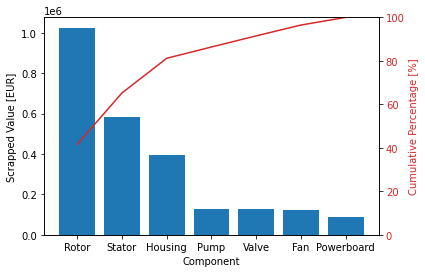

In [45]:
fig, ax1 = plt.subplots()

ax1.set_xlabel('Component')
ax1.set_ylabel('Scrapped Value [EUR]')
ax1.bar(grp.index, grp["Scrapped Value"])

ax2 =ax1.twinx()

color = 'tab:red'
ax2.set_ylabel('Cumulative Percentage [%]', color=color)
ax2.plot(grp.index, grp["Cumulative Percentage"]*100, color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim(0,100)